In [66]:
import un0usb as USB # neeeds `pip3 install un0usb` before

import matplotlib.pyplot as plt
import numpy as np 

import glob

plt.rcParams["figure.figsize"] = (15,5)

USB.__version__

'0.2.6'

In [4]:
# init FTDI device
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6)
# reload configuration (optional step - just to fill BRAM (DACGAIN registers) with initial values)
fpga.reload()
# reset fpga
fpga.reset()

In [61]:
gain = [int(230 + ((600-400)*x*x*x/32/32/32)) for x in range(32)]
for I in range(3):
    gain[I]=0

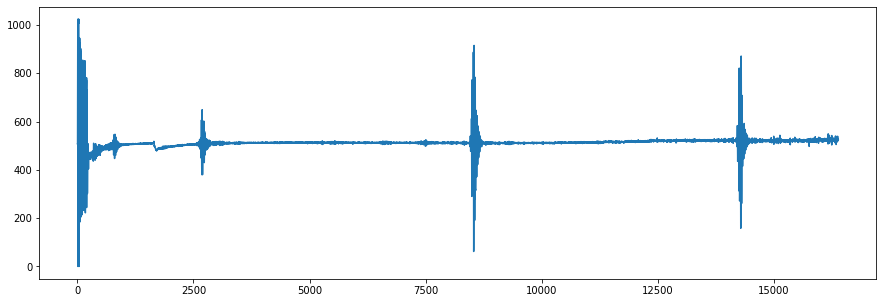

In [62]:
acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 
plt.plot(acq_res[0])

In [64]:
for k in range(15):
    fpga.set_pulseform(initDelay=5, POn=5+k, PInter=5+k, Poff=5000-2*k) 
    acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 
    fpga.save("FichierDeTest")

# Reading

In [94]:
withC = glob.glob("withC/*.npz")
print(withC)
USPlot = USB.FView()

['withC/20201128171702.npz', 'withC/20201128171722.npz', 'withC/20201128171718.npz', 'withC/20201128171650.npz', 'withC/20201128171706.npz', 'withC/20201128171726.npz', 'withC/20201128171658.npz', 'withC/20201128171730.npz', 'withC/20201128171714.npz', 'withC/20201128171642.npz', 'withC/20201128171710.npz', 'withC/20201128171738.npz', 'withC/20201128171734.npz', 'withC/20201128171654.npz', 'withC/20201128171646.npz']


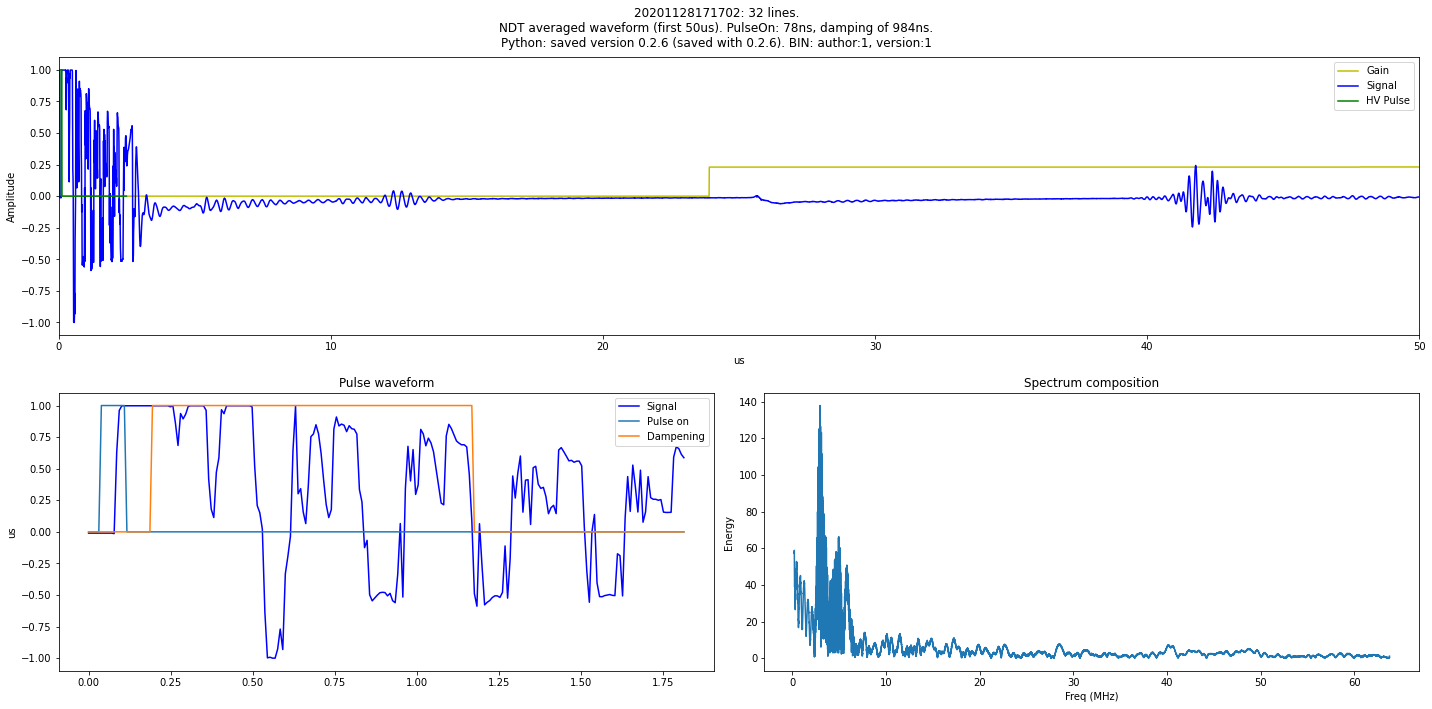

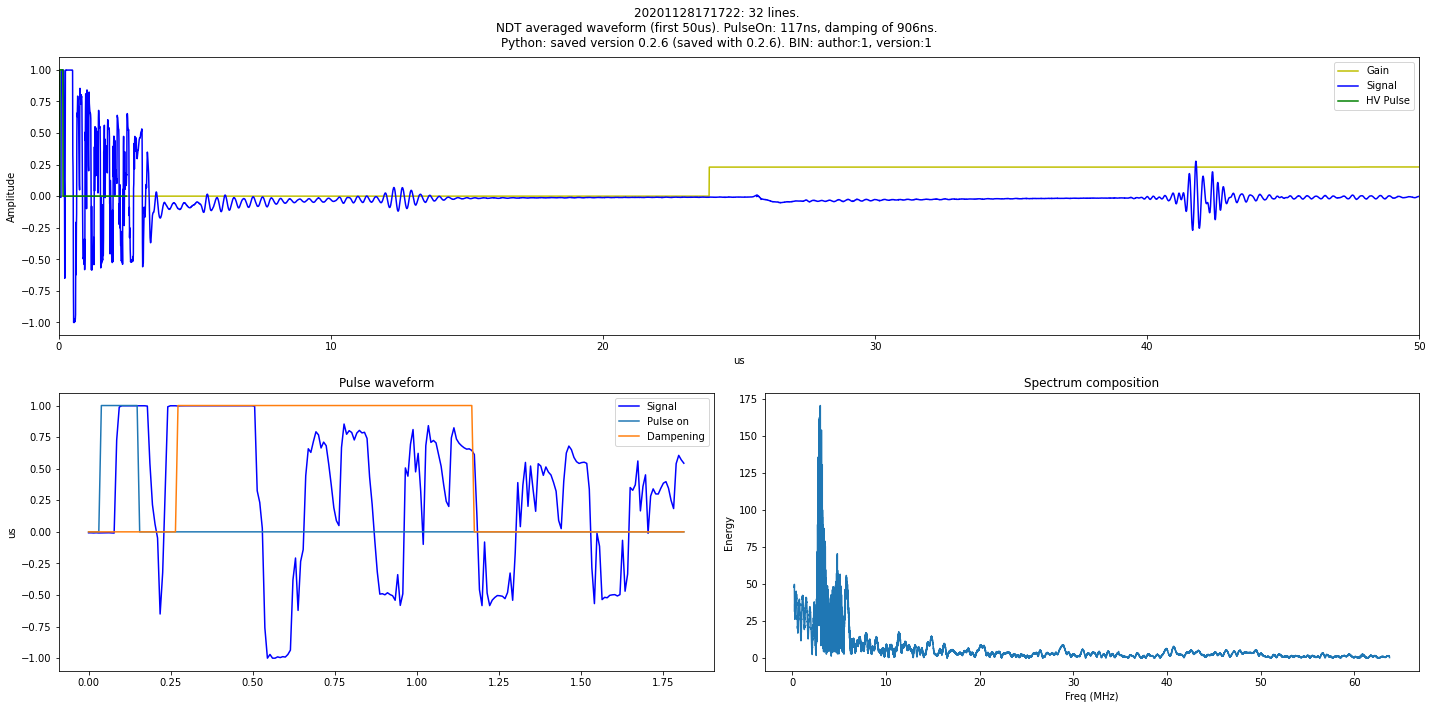

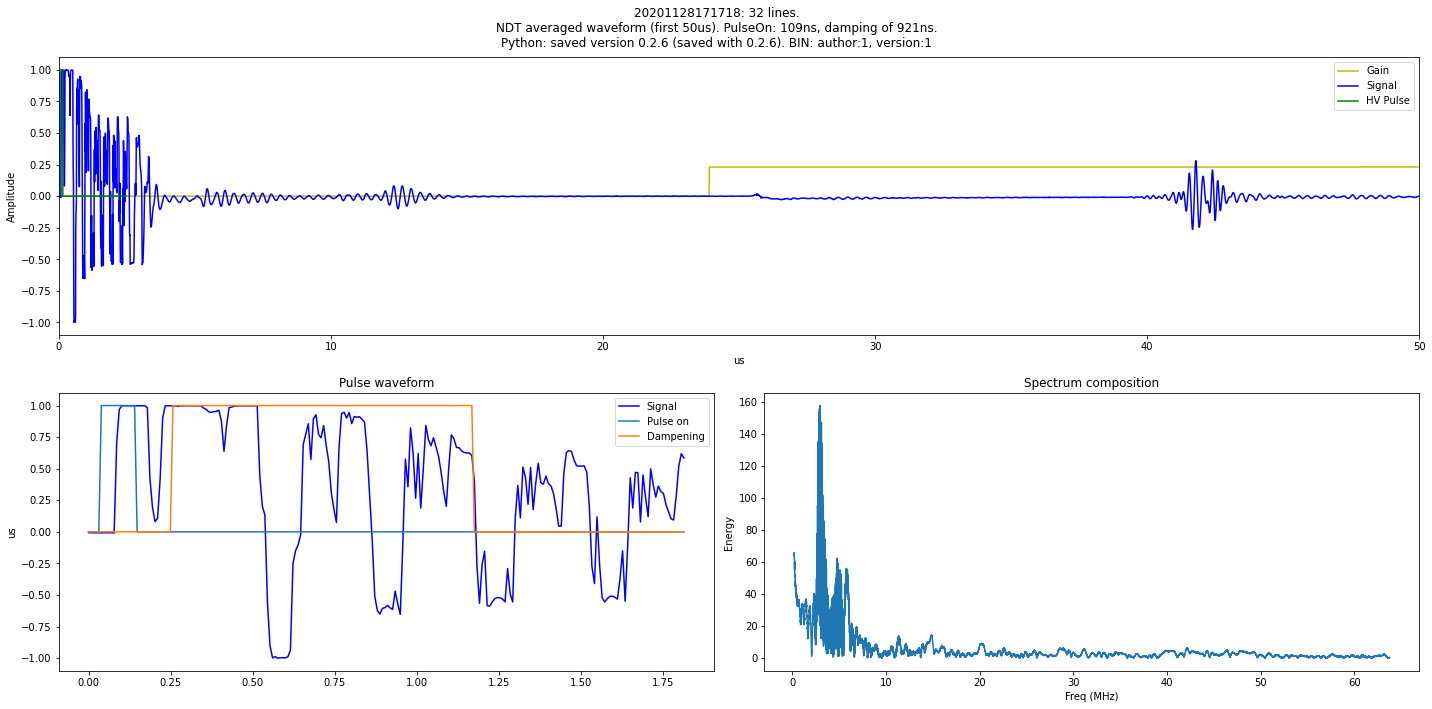

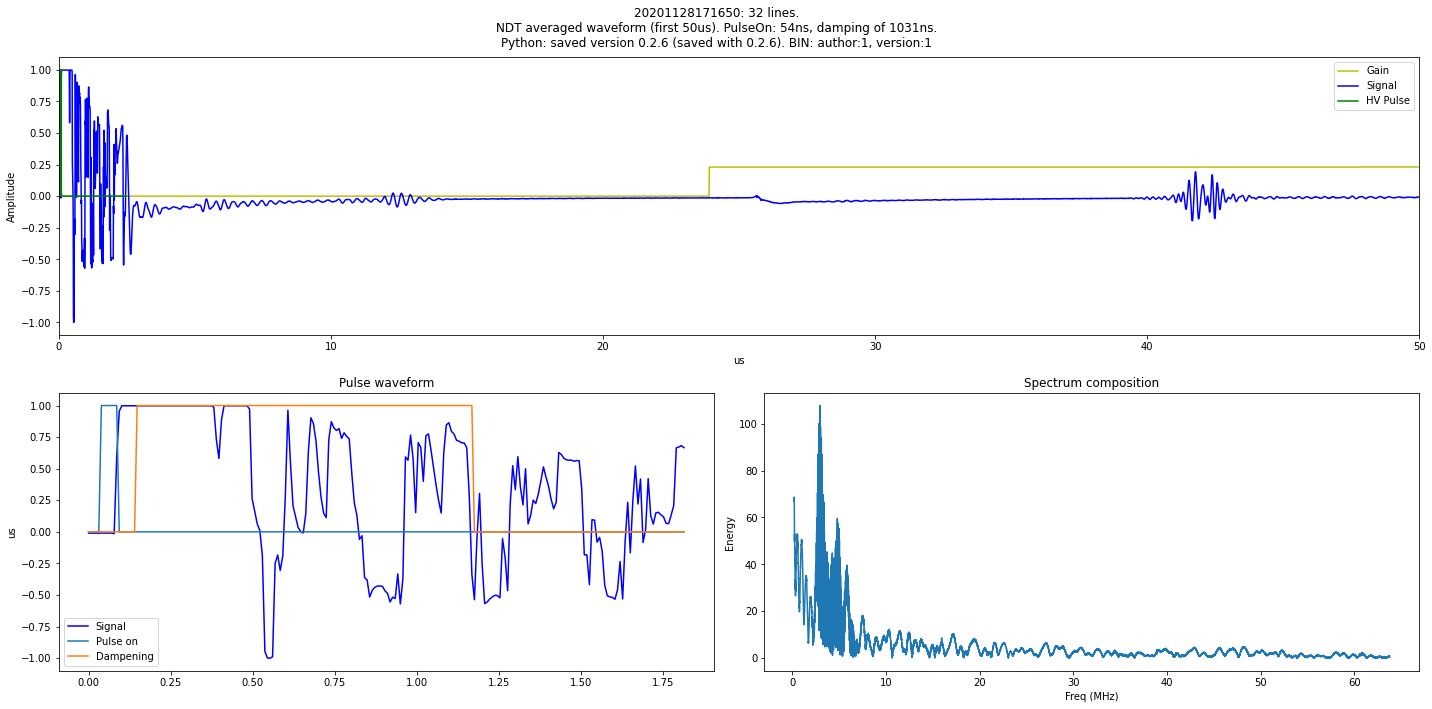

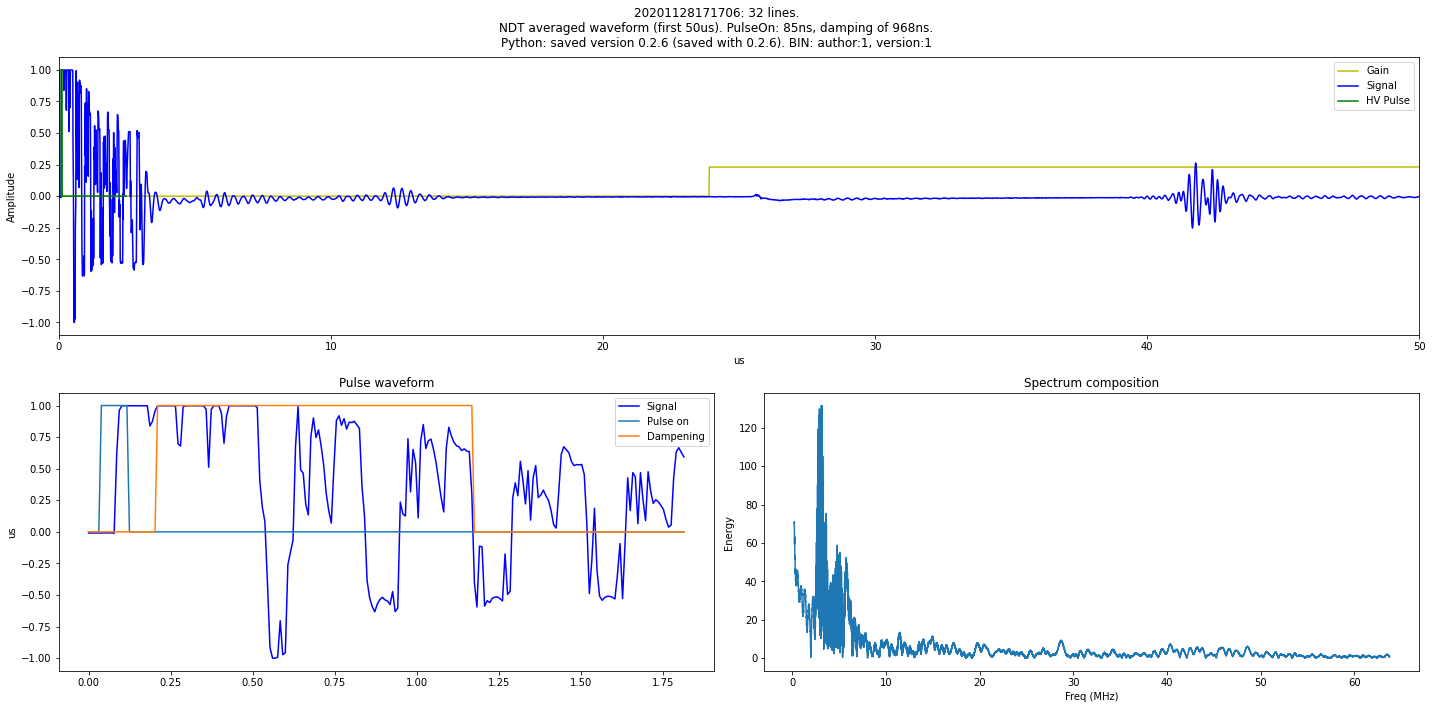

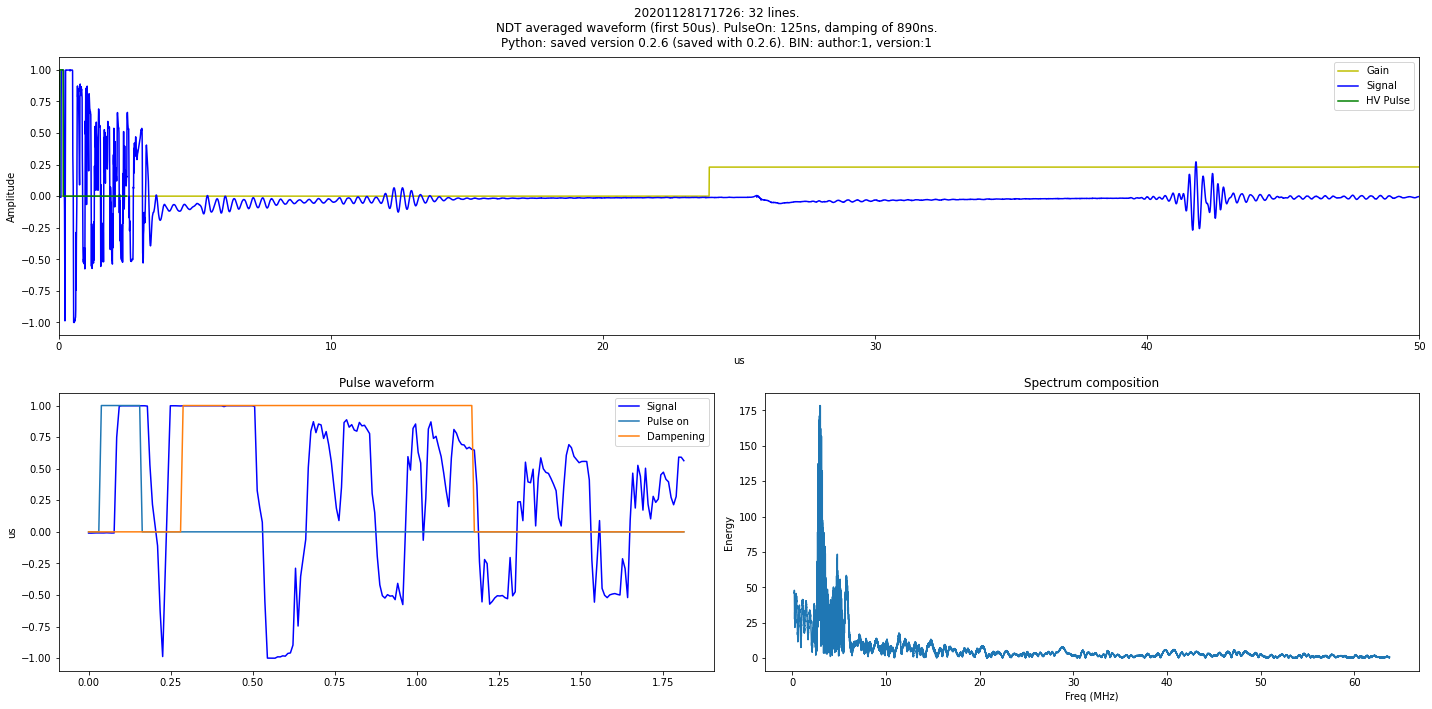

withC/20201128171726.npz


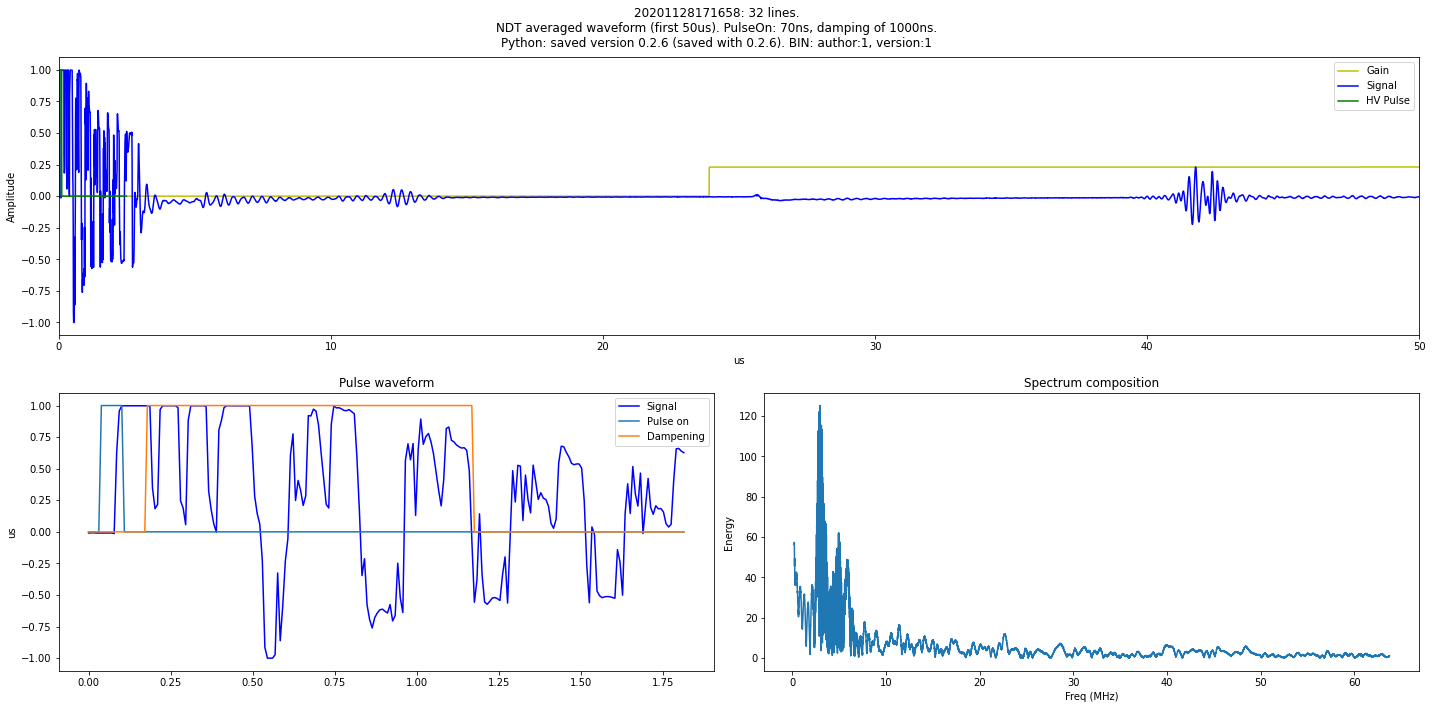

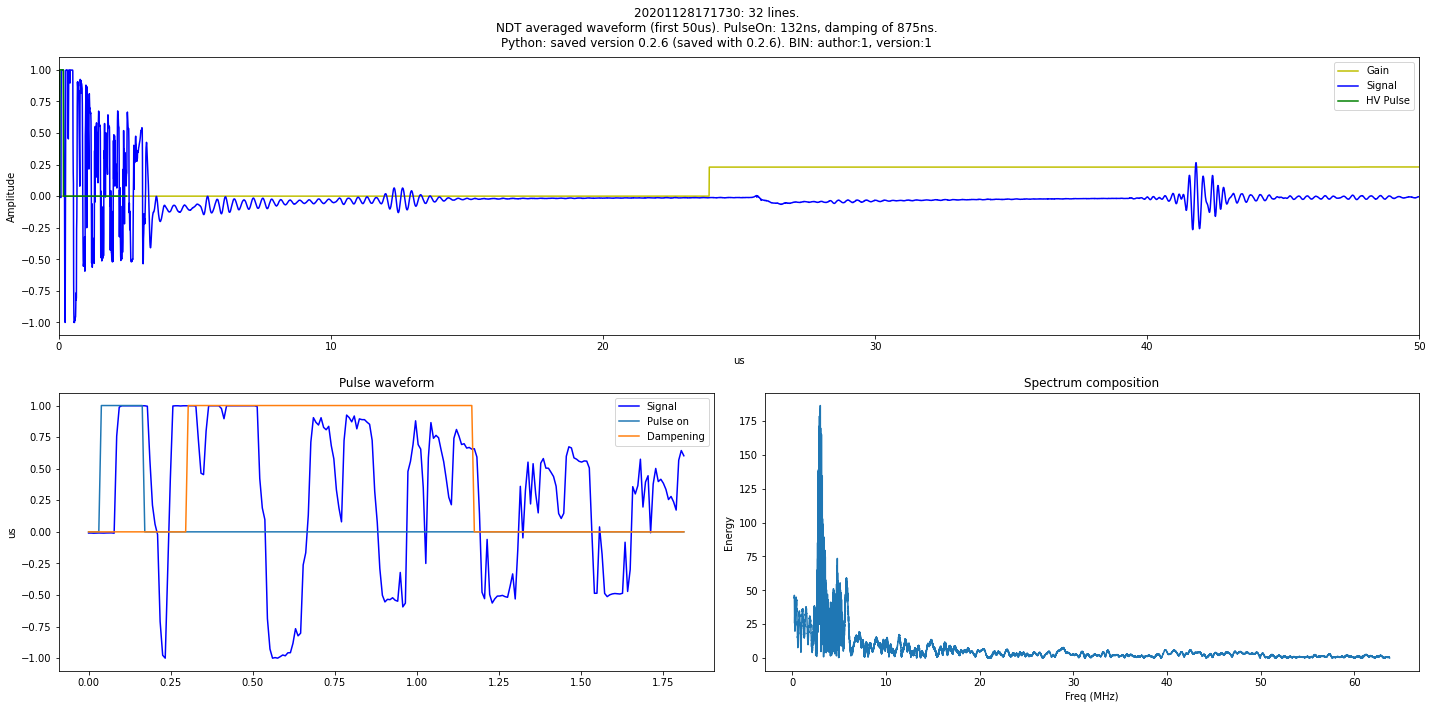

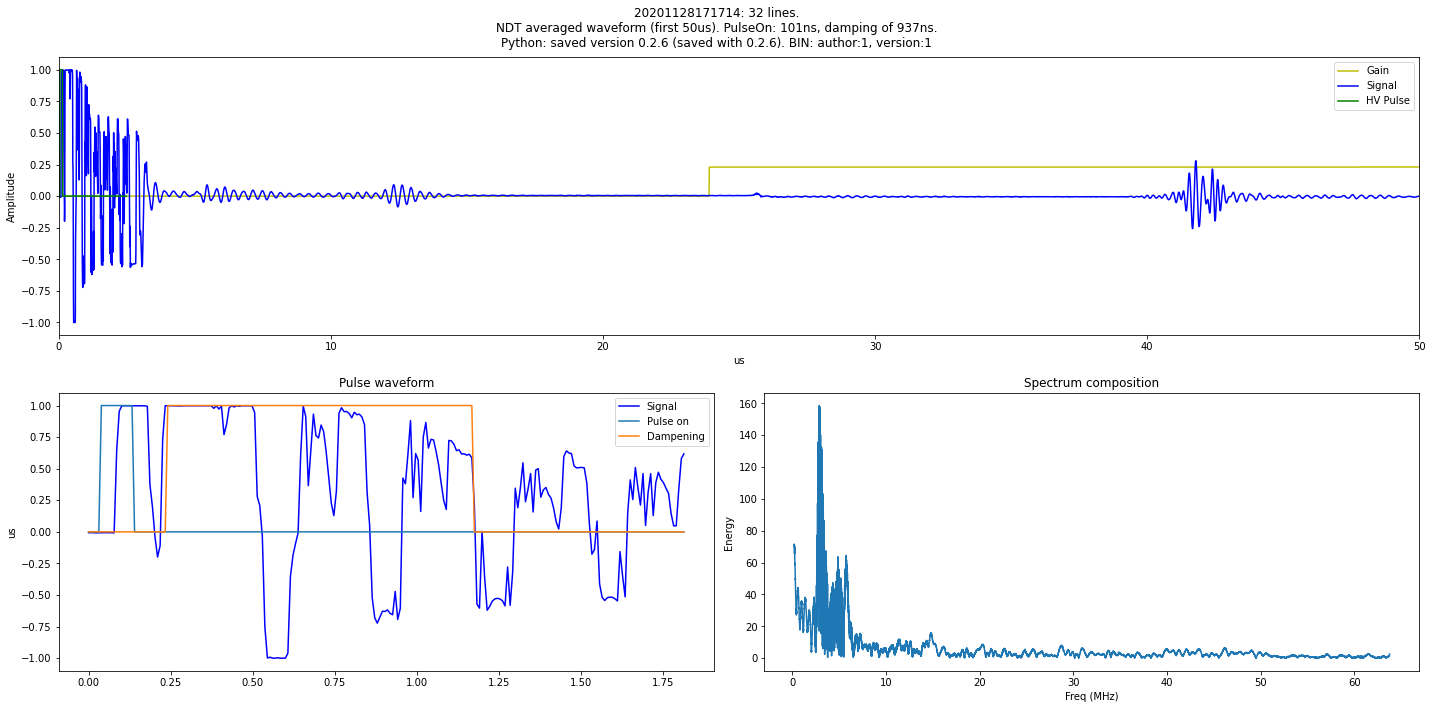

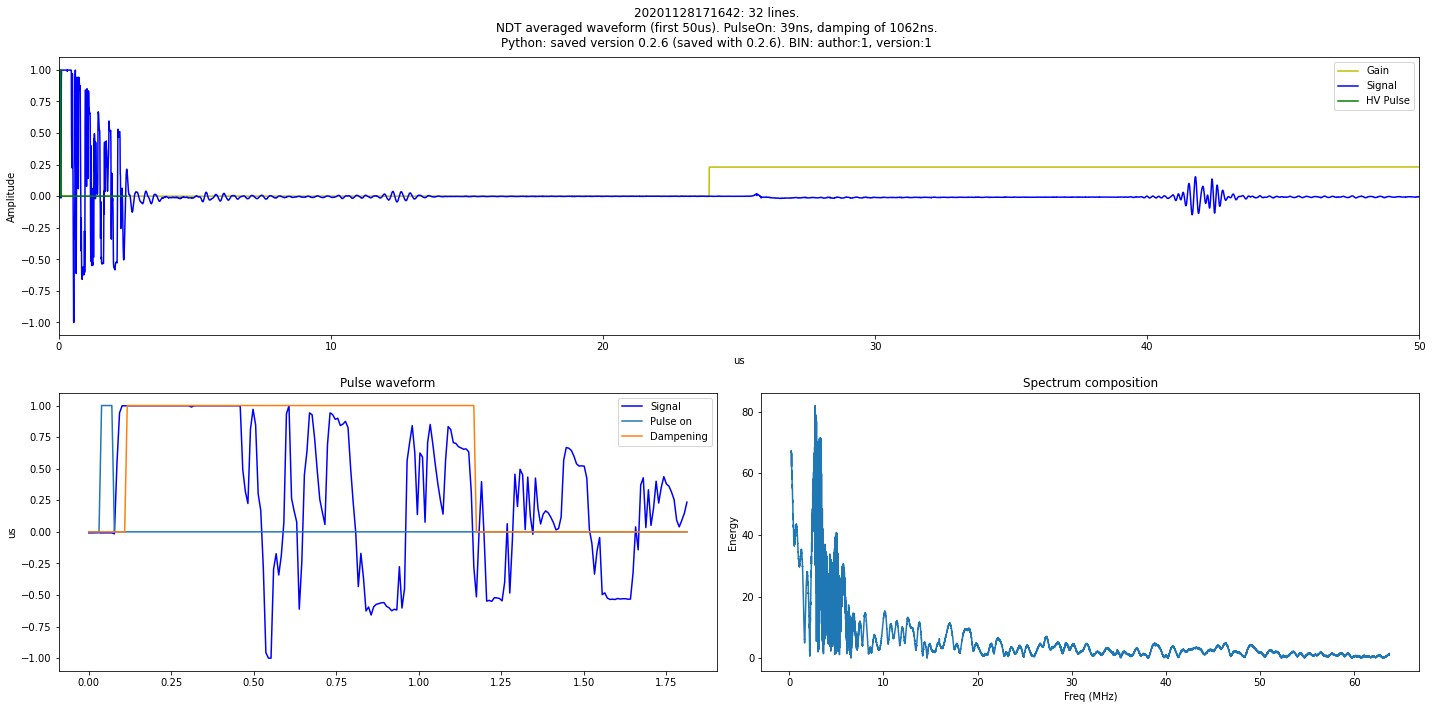

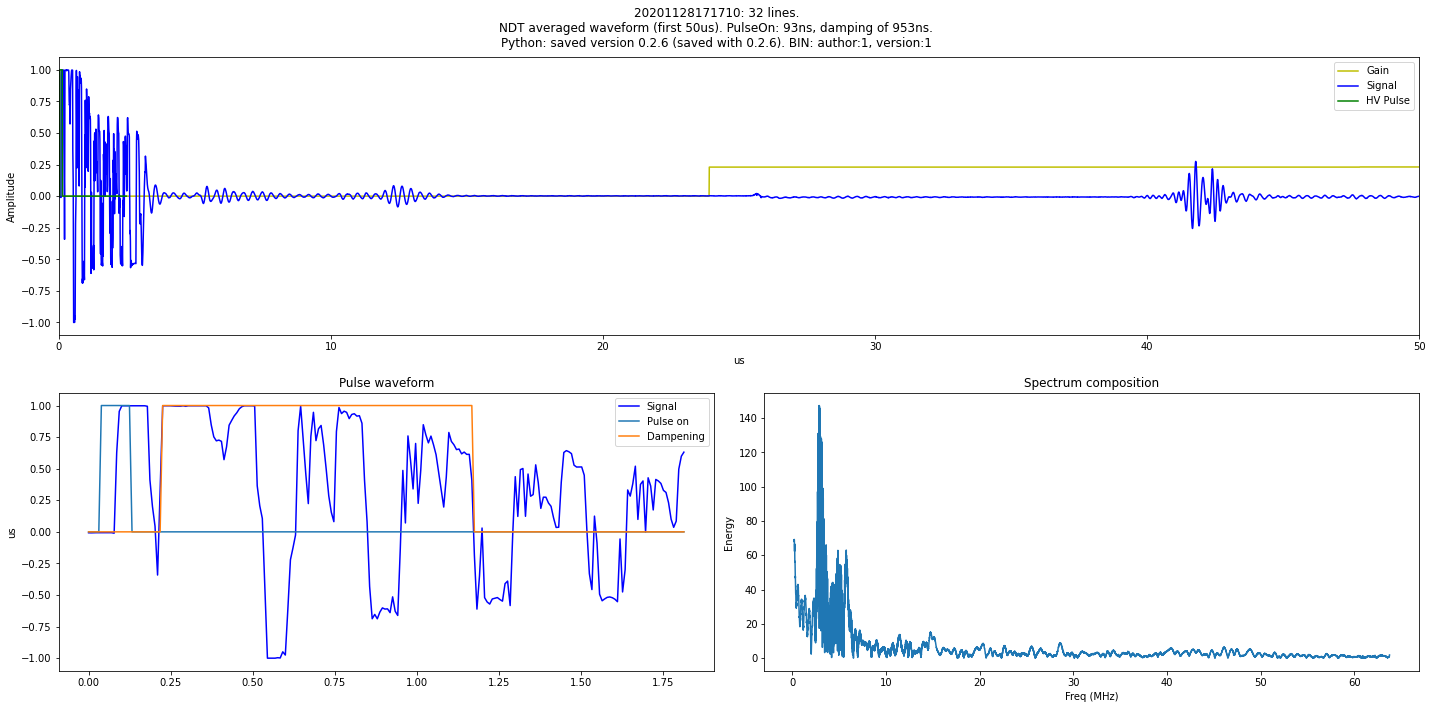

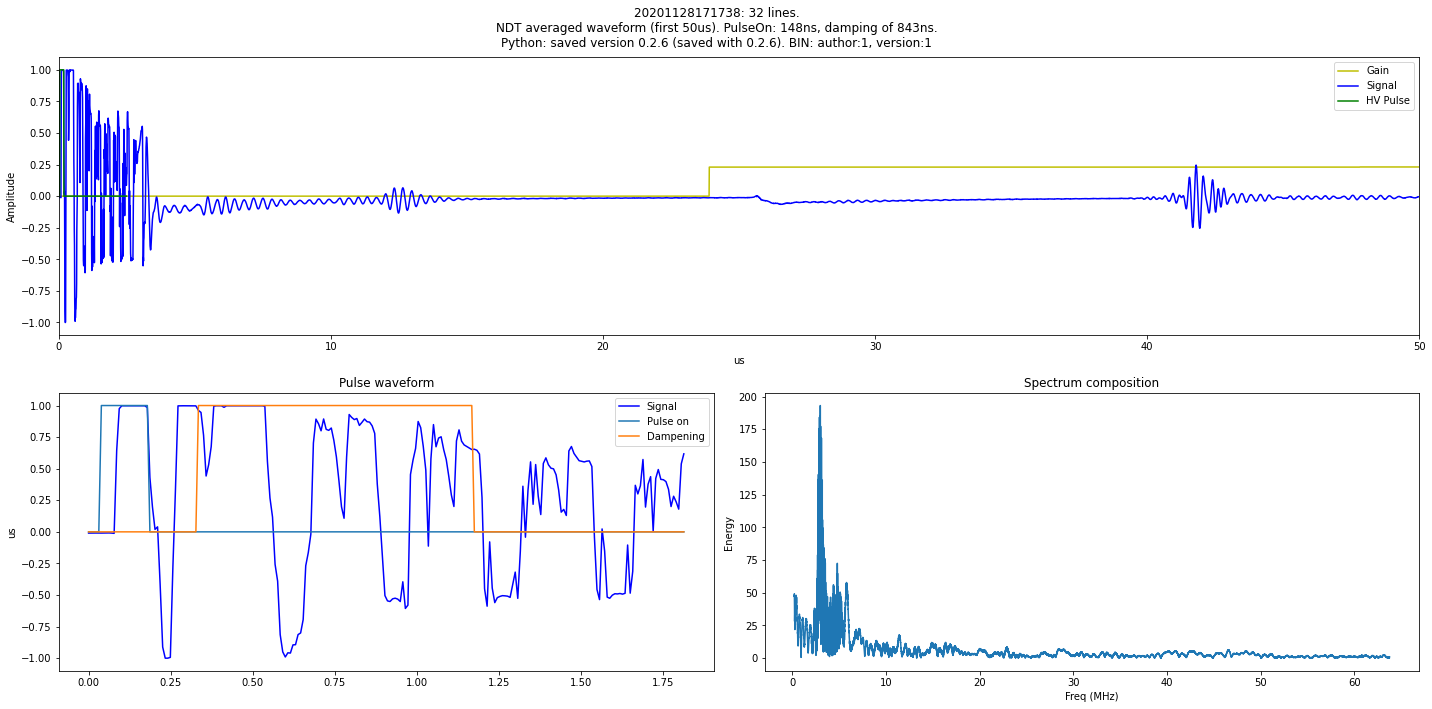

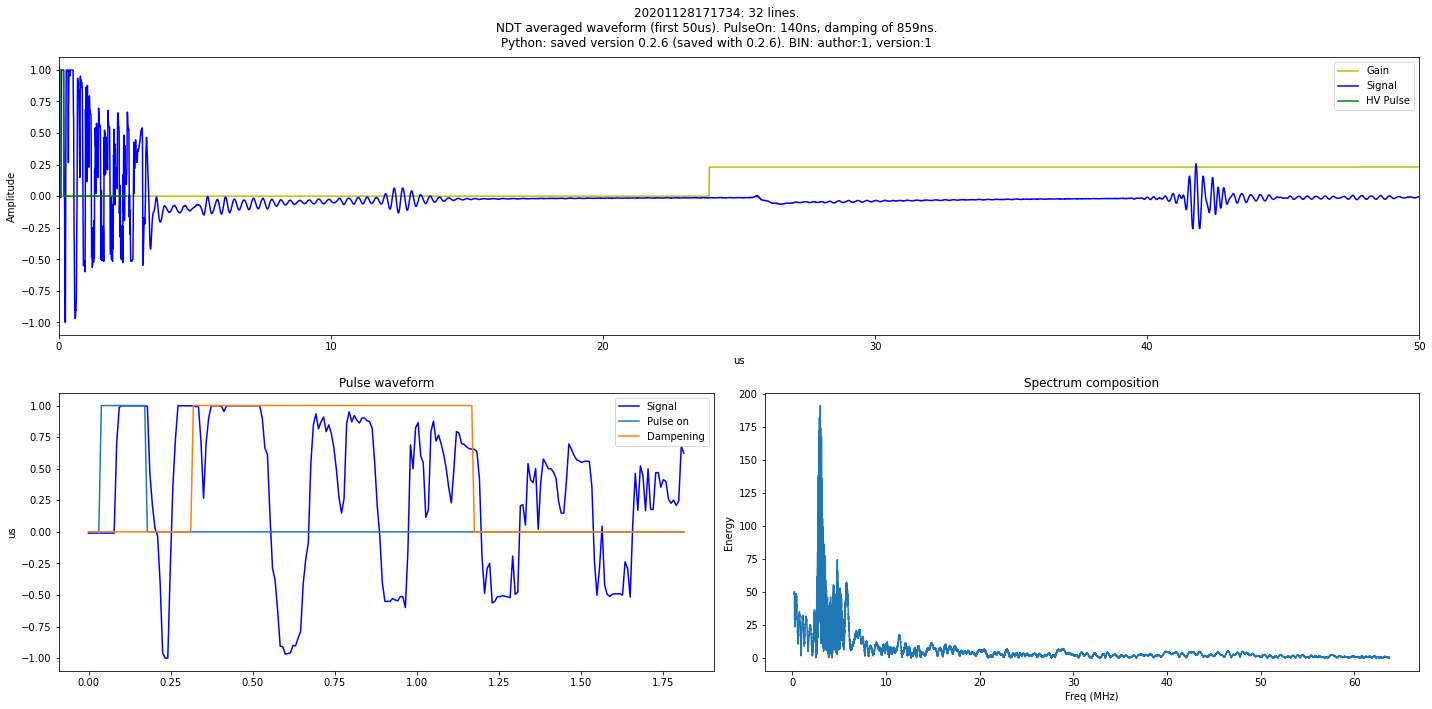

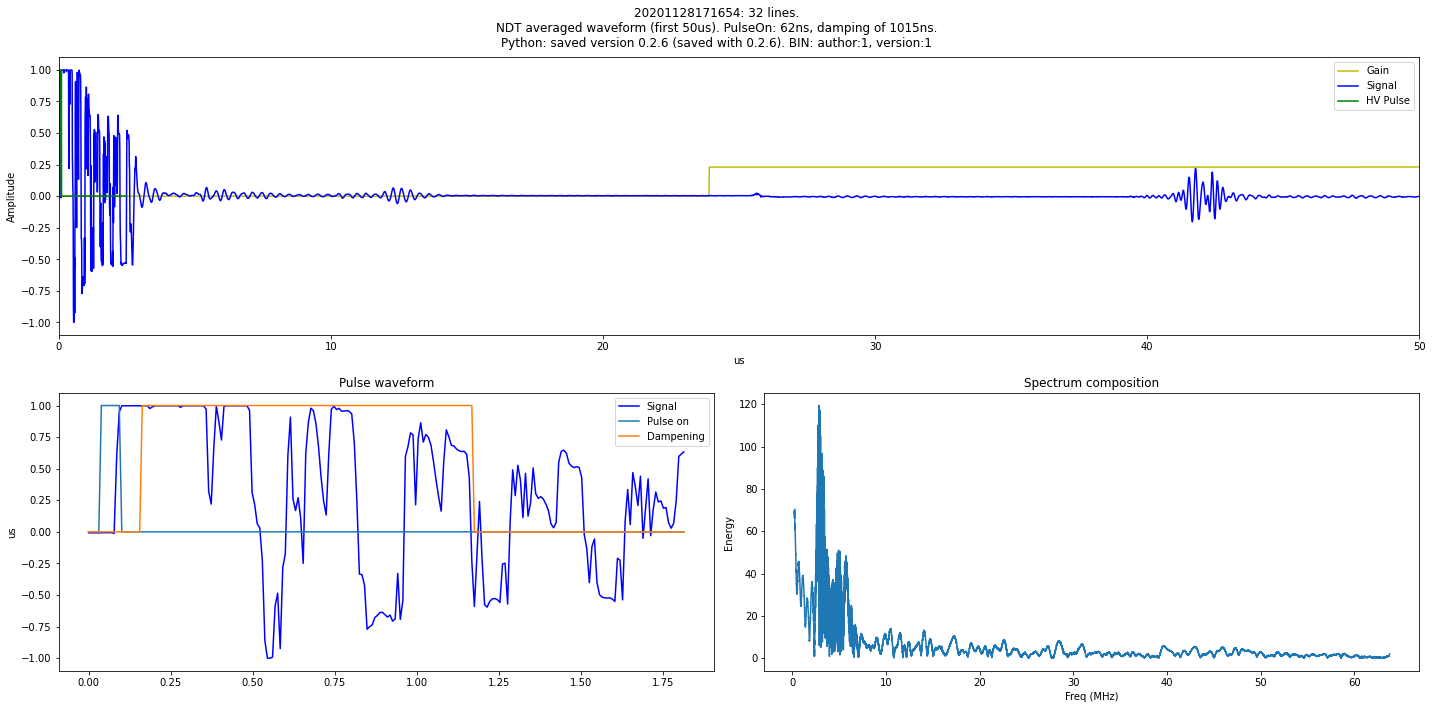

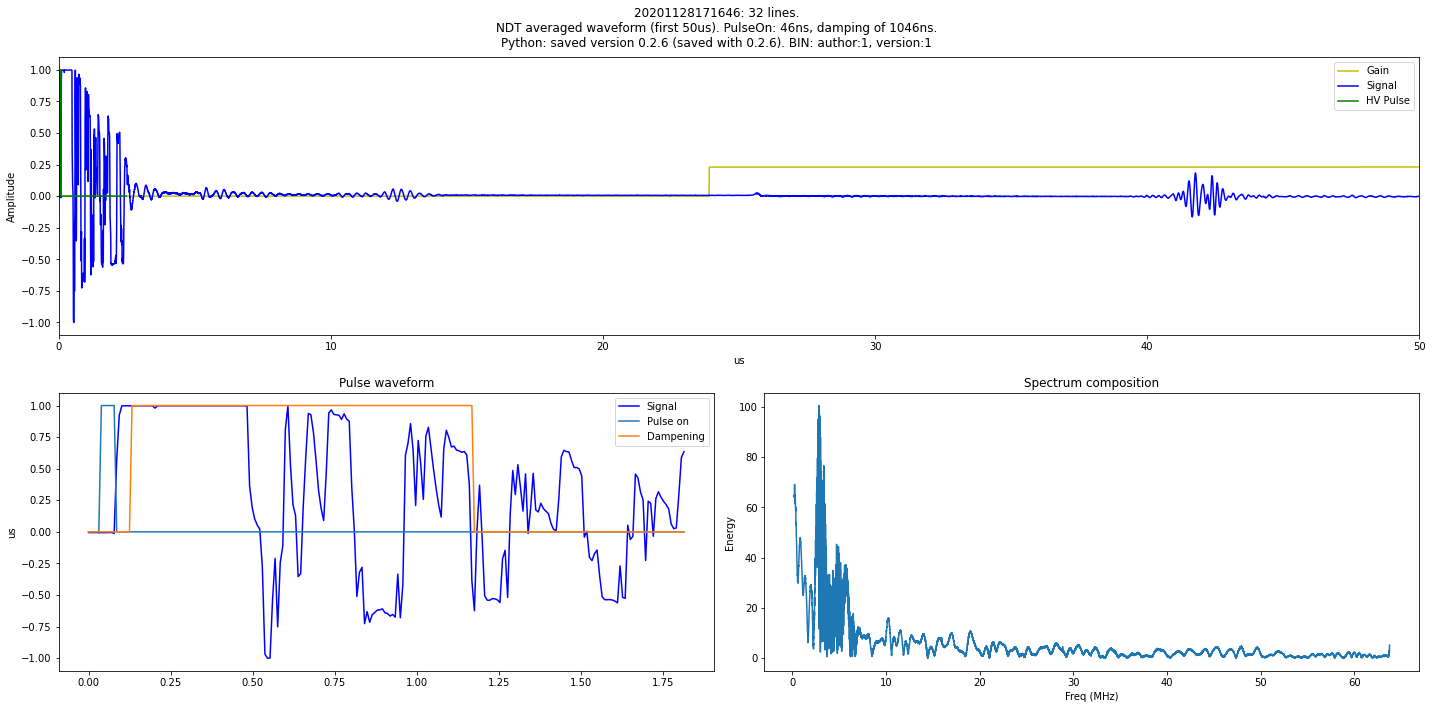

In [115]:
Xwc = []
Ywc = []
for file in withC:
    data = USPlot.readfile(file)
    Xwc.append(int(data["t_on"]))
    if int(data["t_on"]) == 16:
        print(file)
    Ywc.append(np.max(np.abs(data["signal"][0][12500:])))

In [108]:
woC = glob.glob("woC/*.npz")
print(woC)
USPlot = USB.FView()

['woC/20201128171918.npz', 'woC/20201128171906.npz', 'woC/20201128171858.npz', 'woC/20201128171914.npz', 'woC/20201128171910.npz', 'woC/20201128171922.npz', 'woC/20201128171854.npz', 'woC/20201128171835.npz', 'woC/20201128171827.npz', 'woC/20201128171850.npz', 'woC/20201128171839.npz', 'woC/20201128171842.npz', 'woC/20201128171846.npz', 'woC/20201128171902.npz', 'woC/20201128171831.npz']


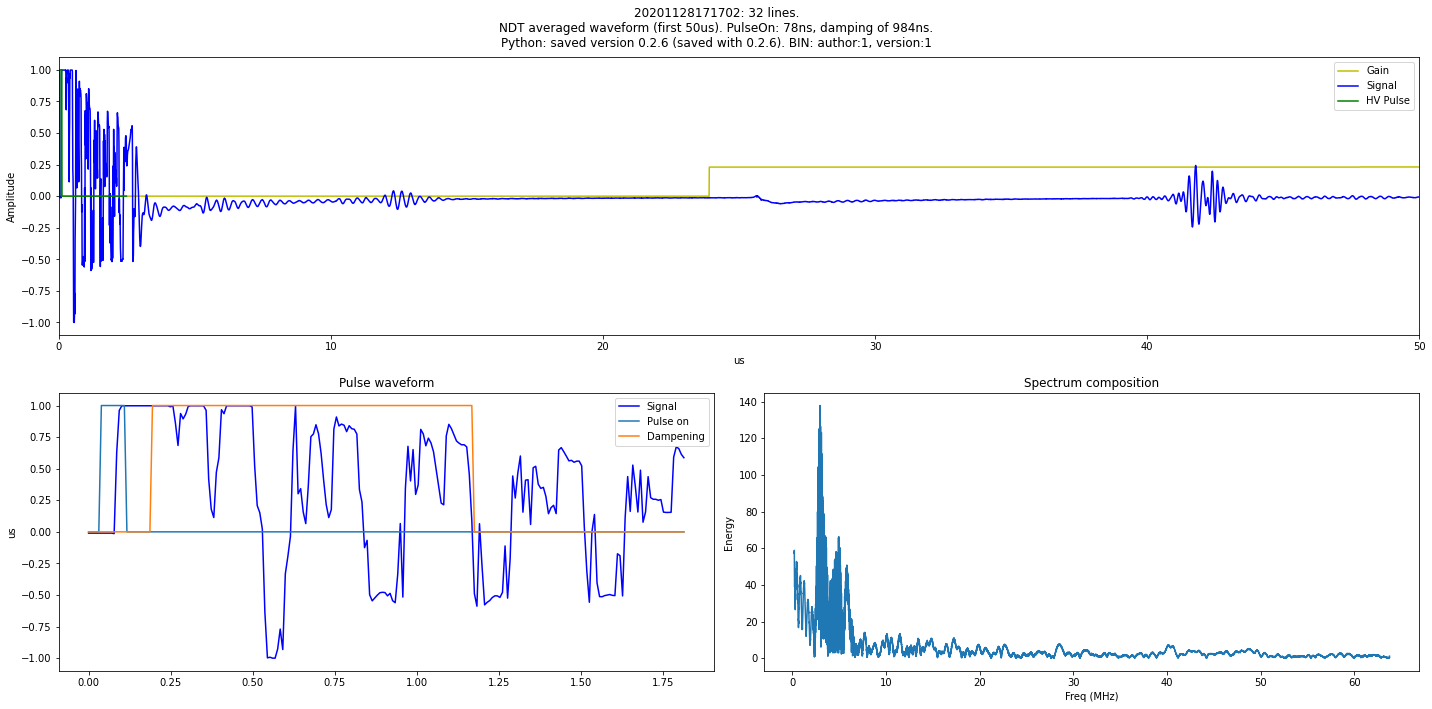

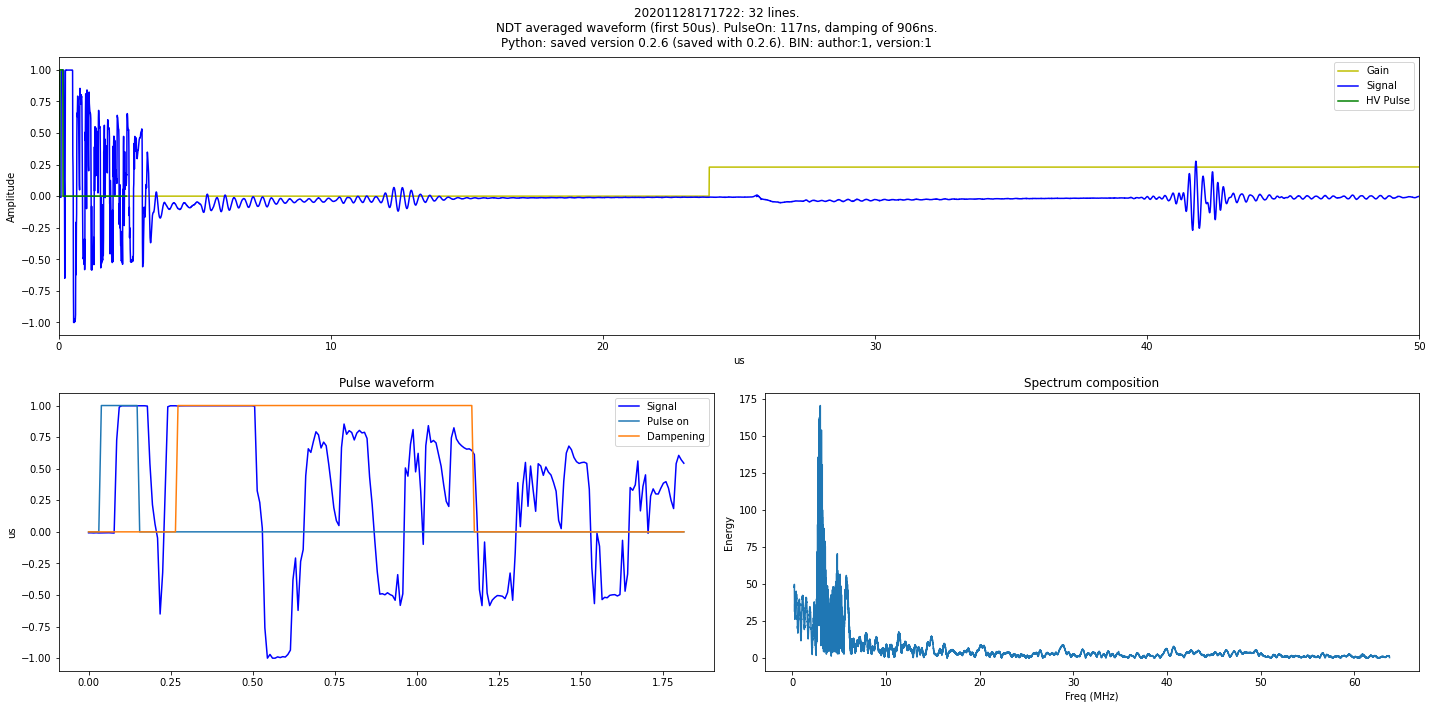

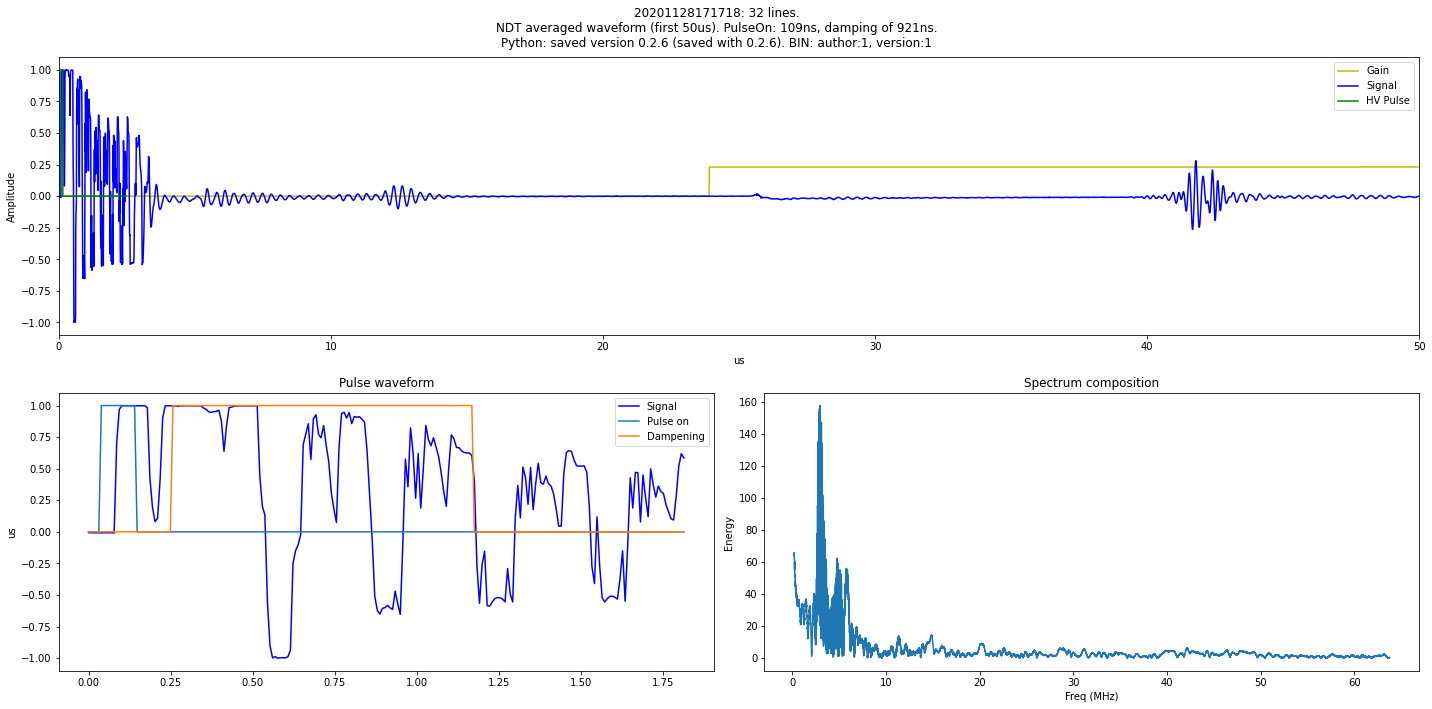

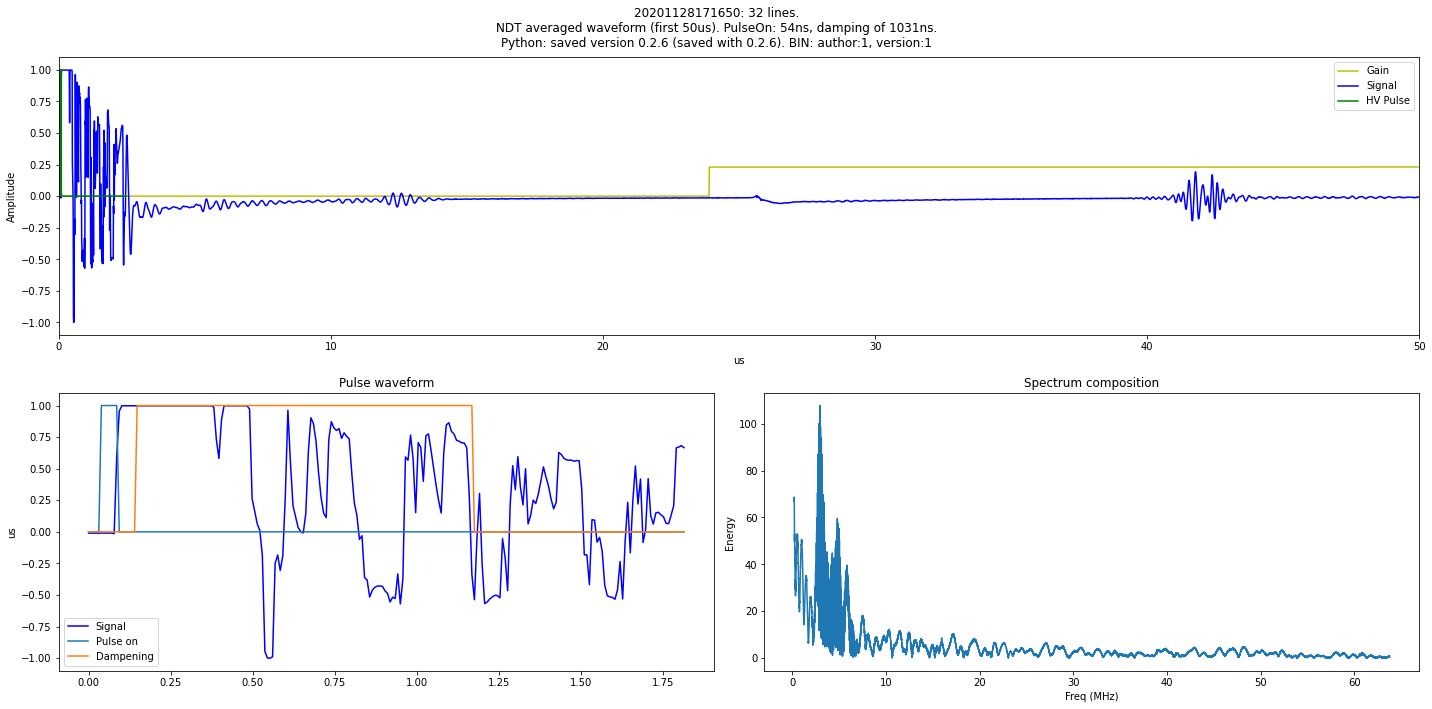

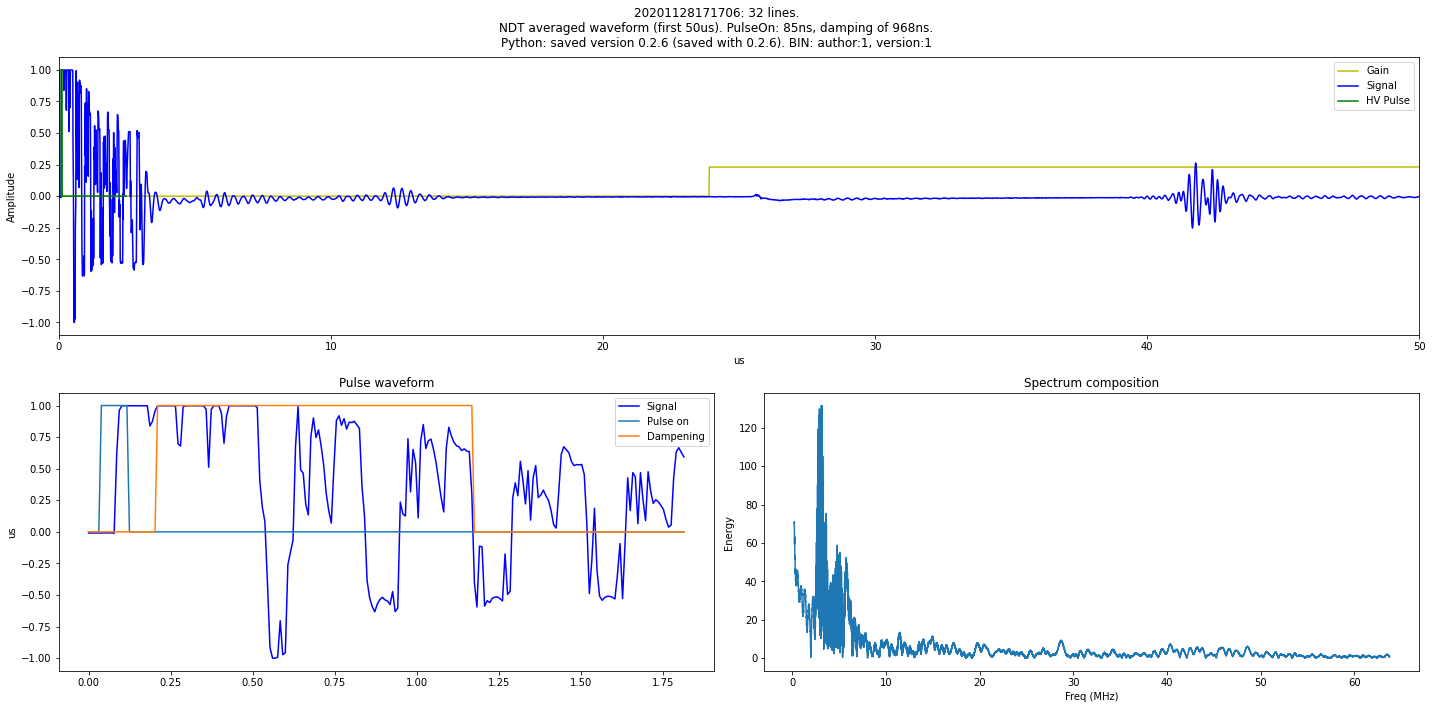

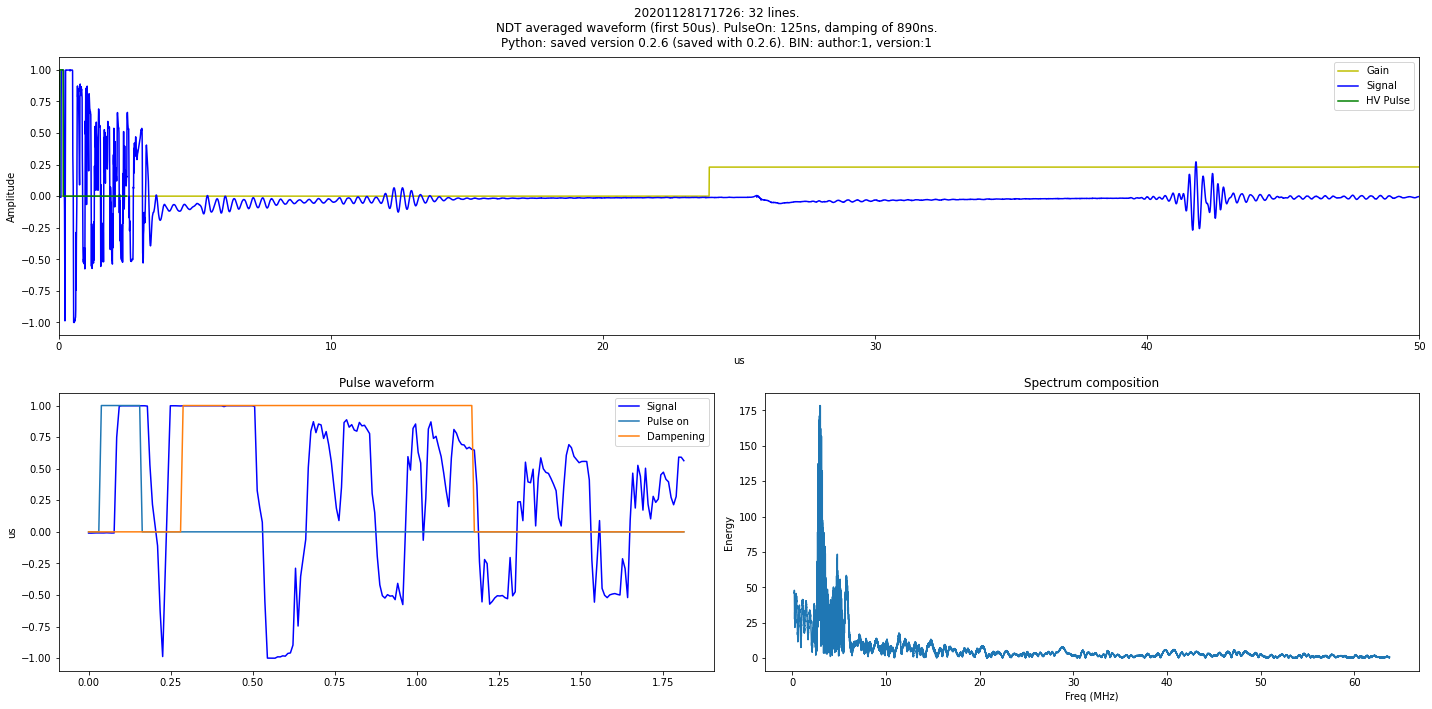

withC/20201128171726.npz


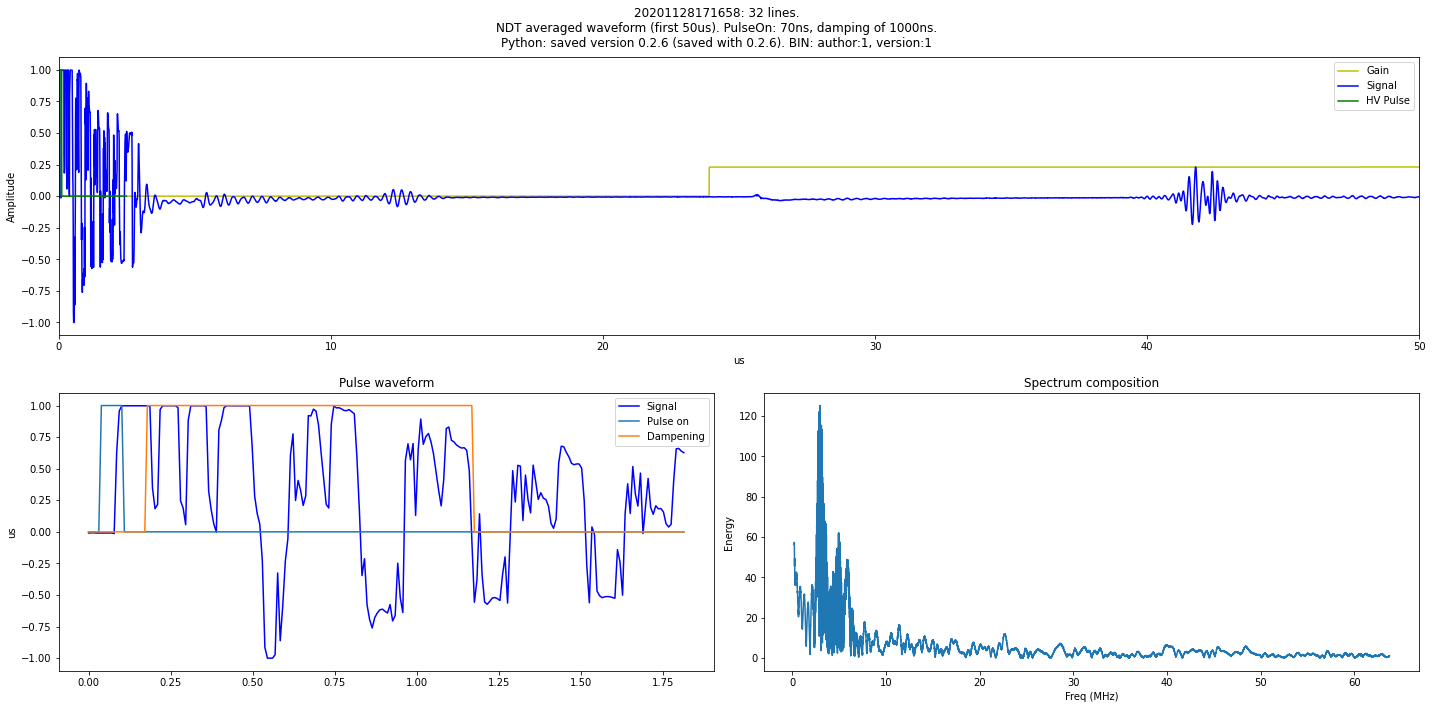

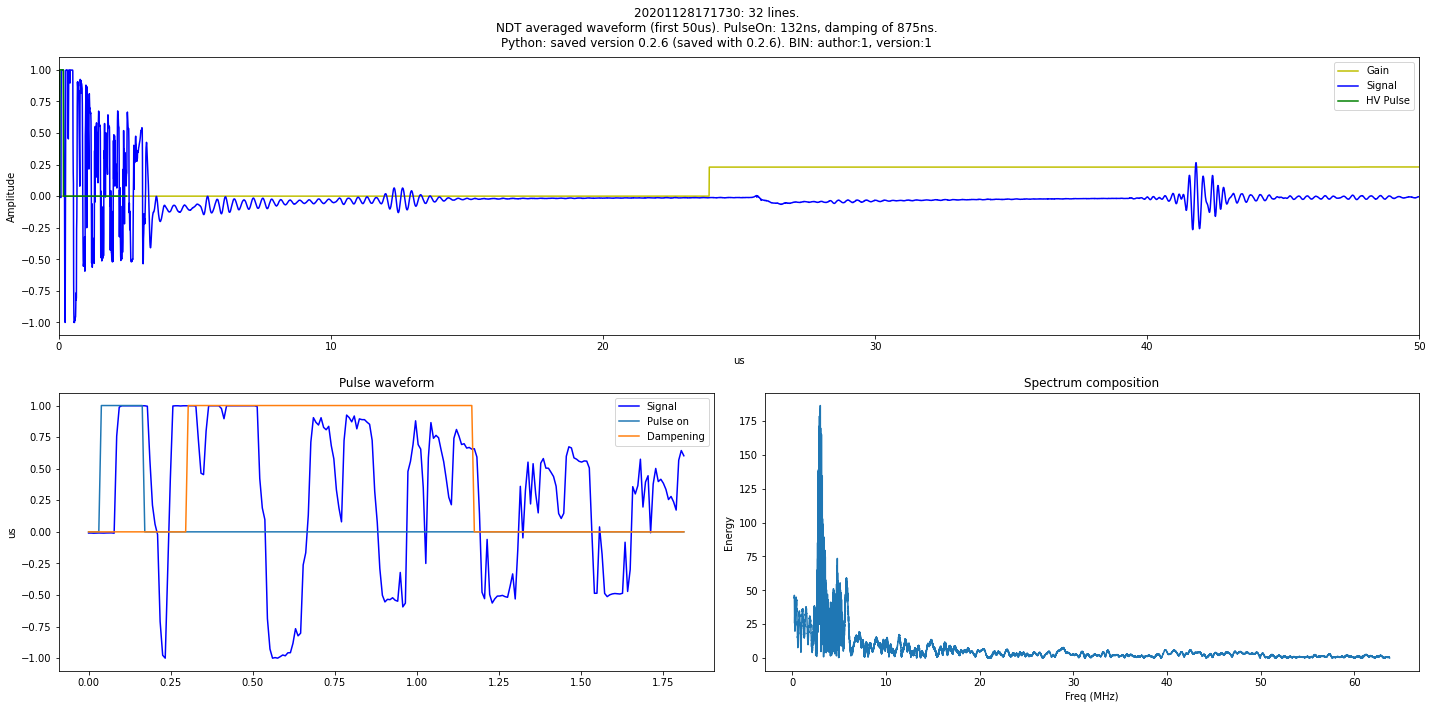

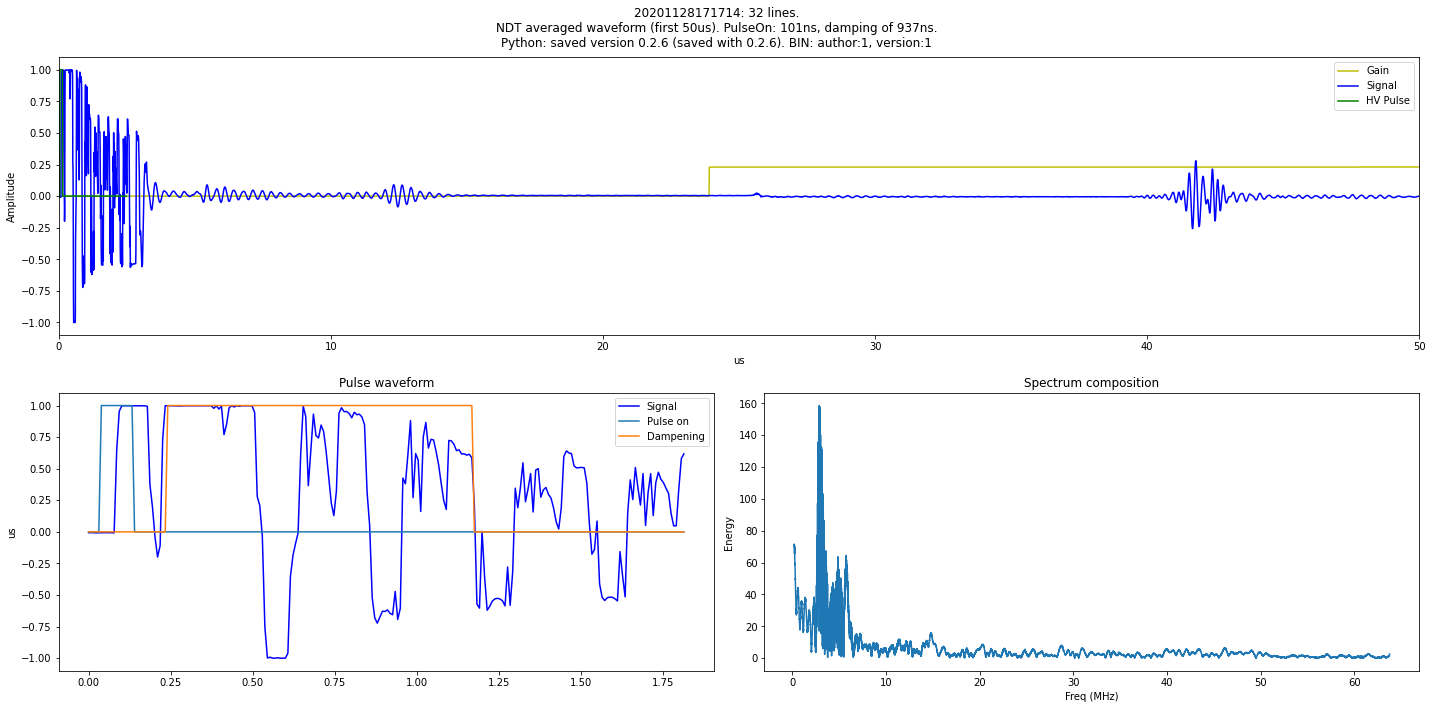

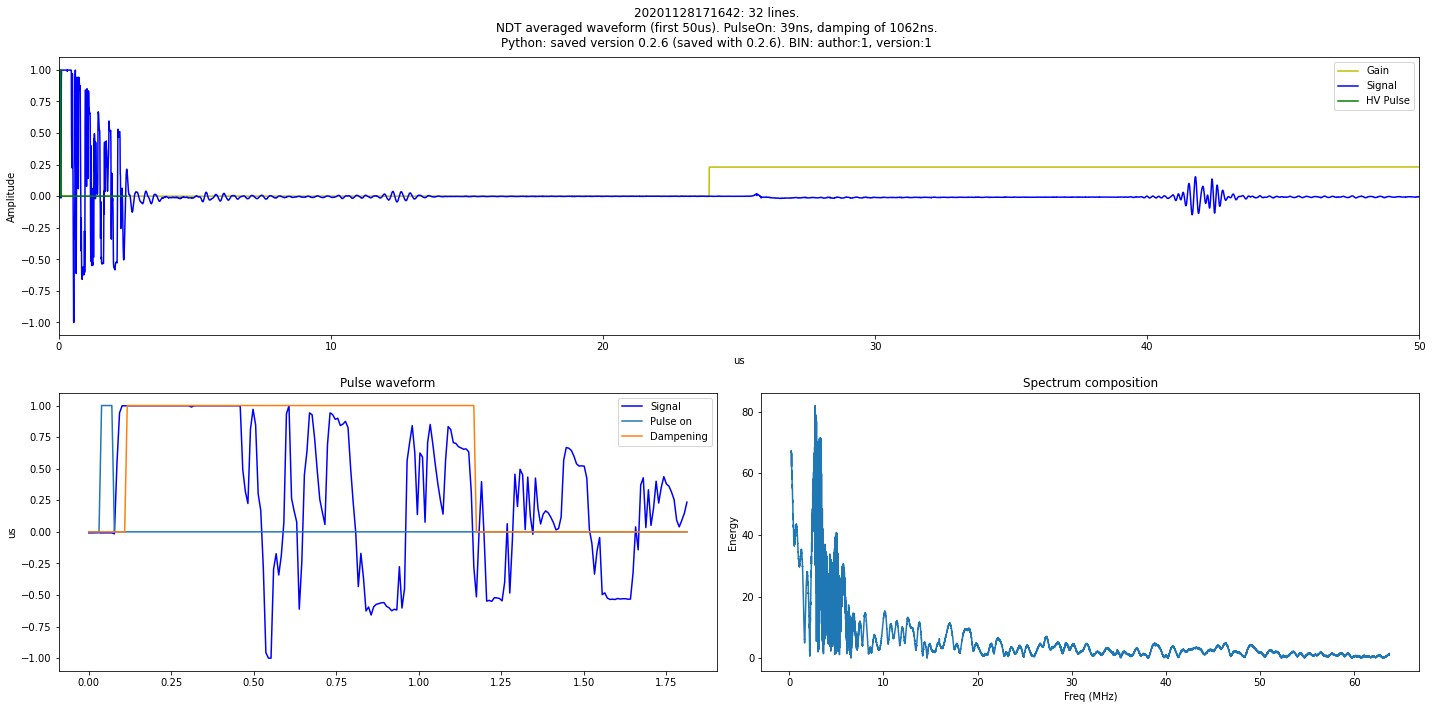

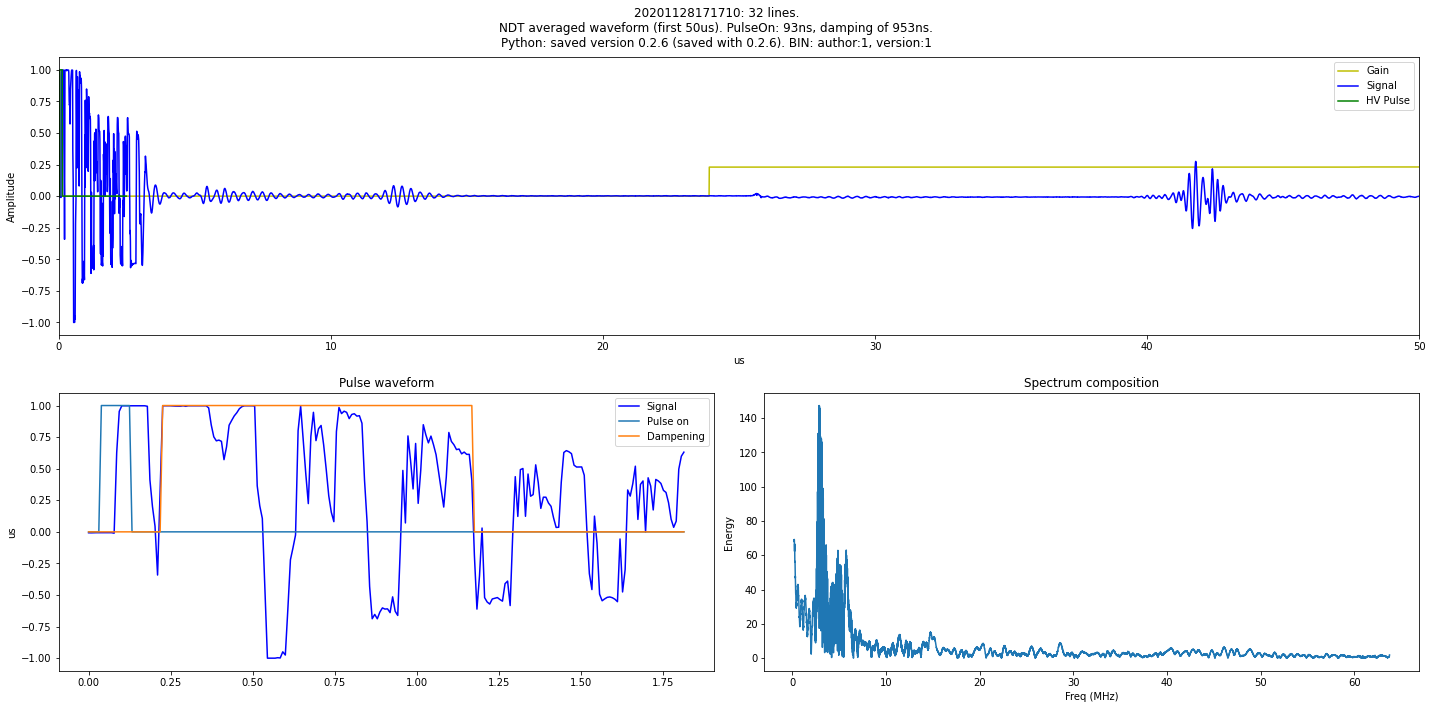

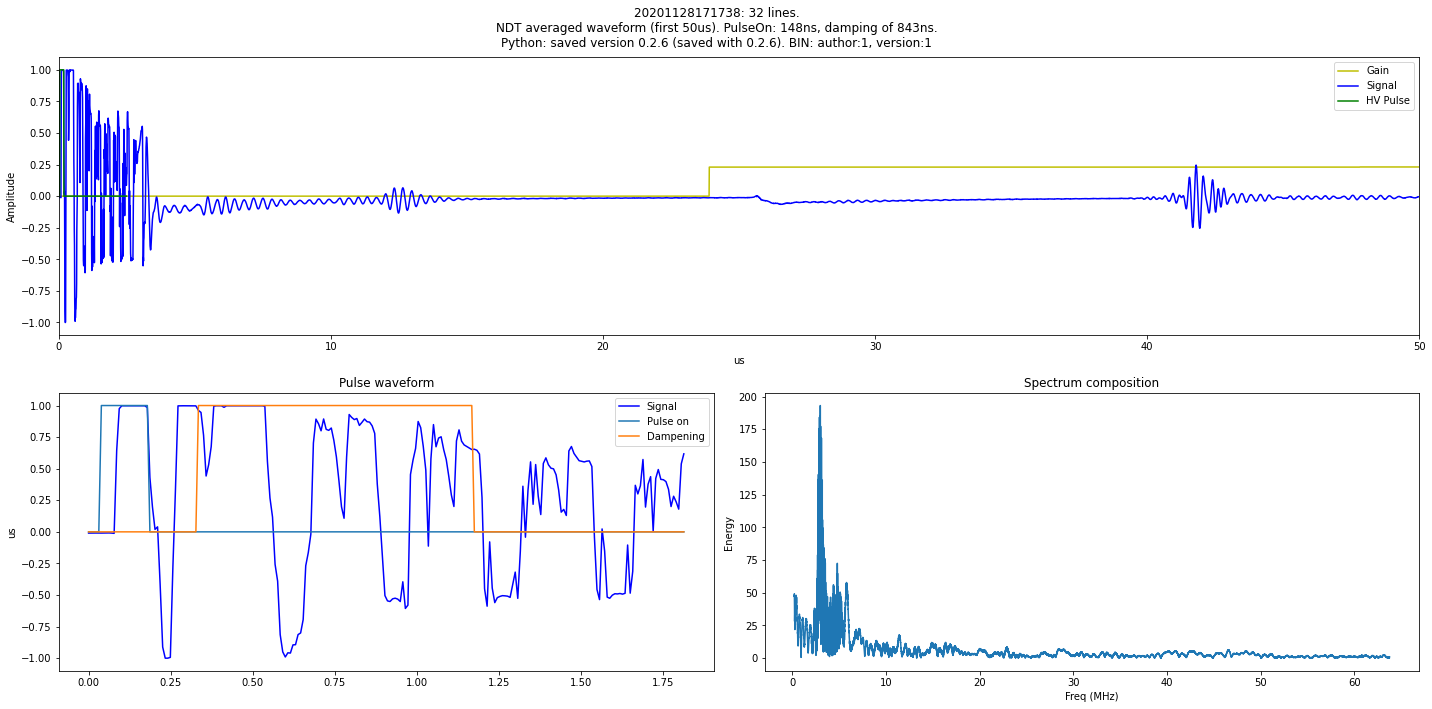

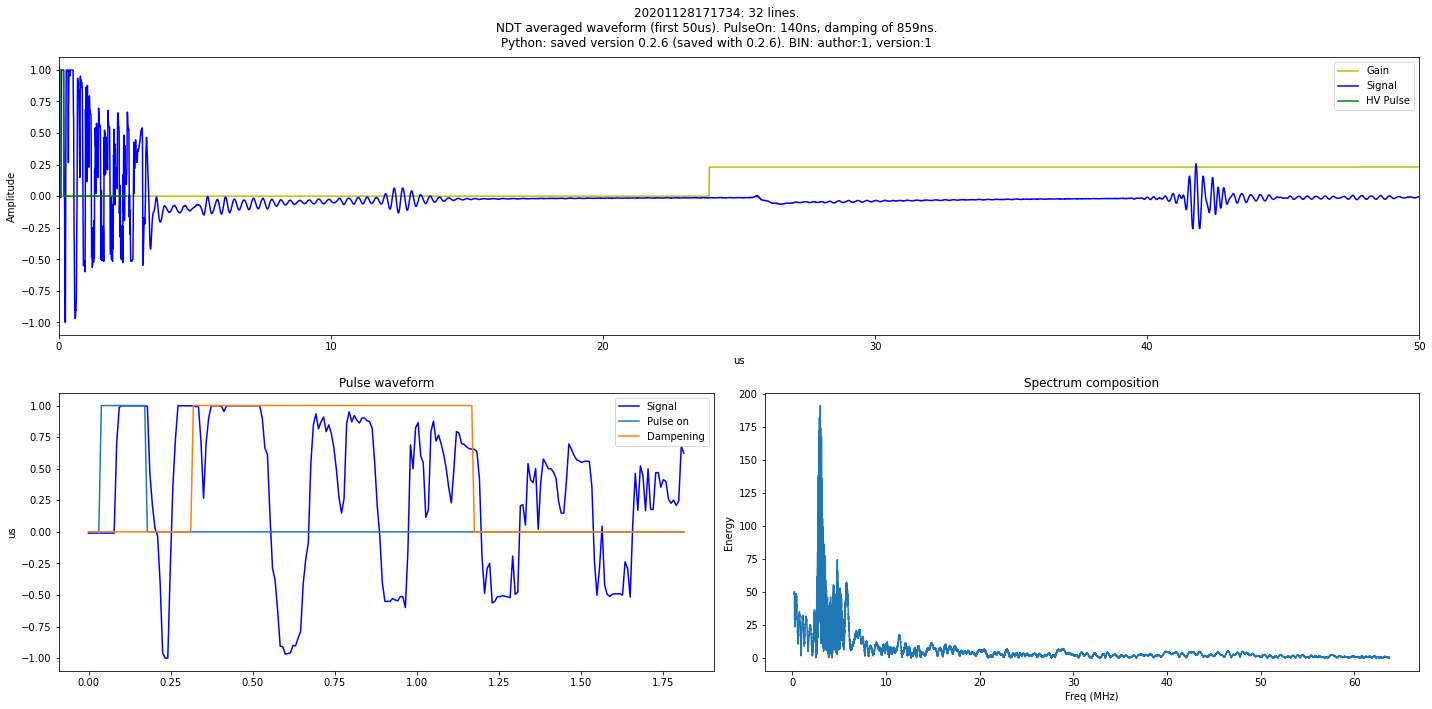

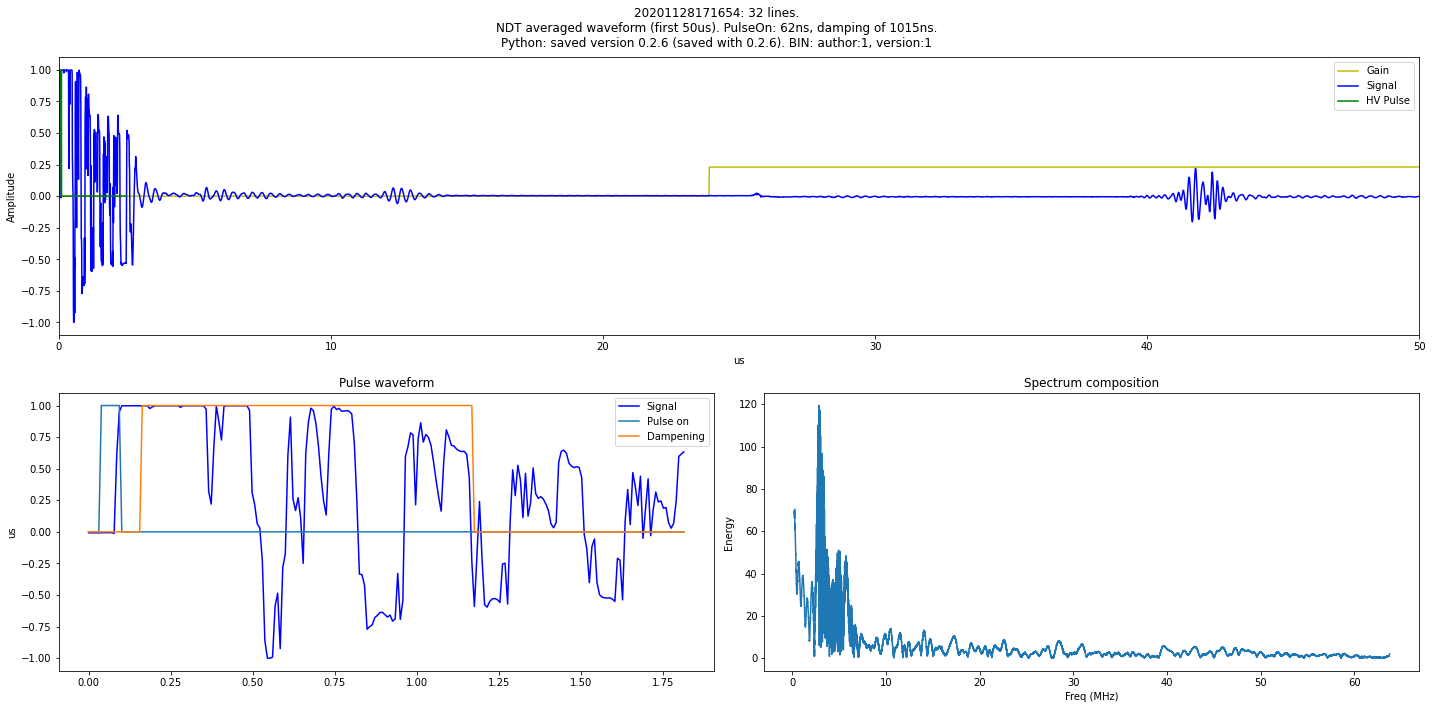

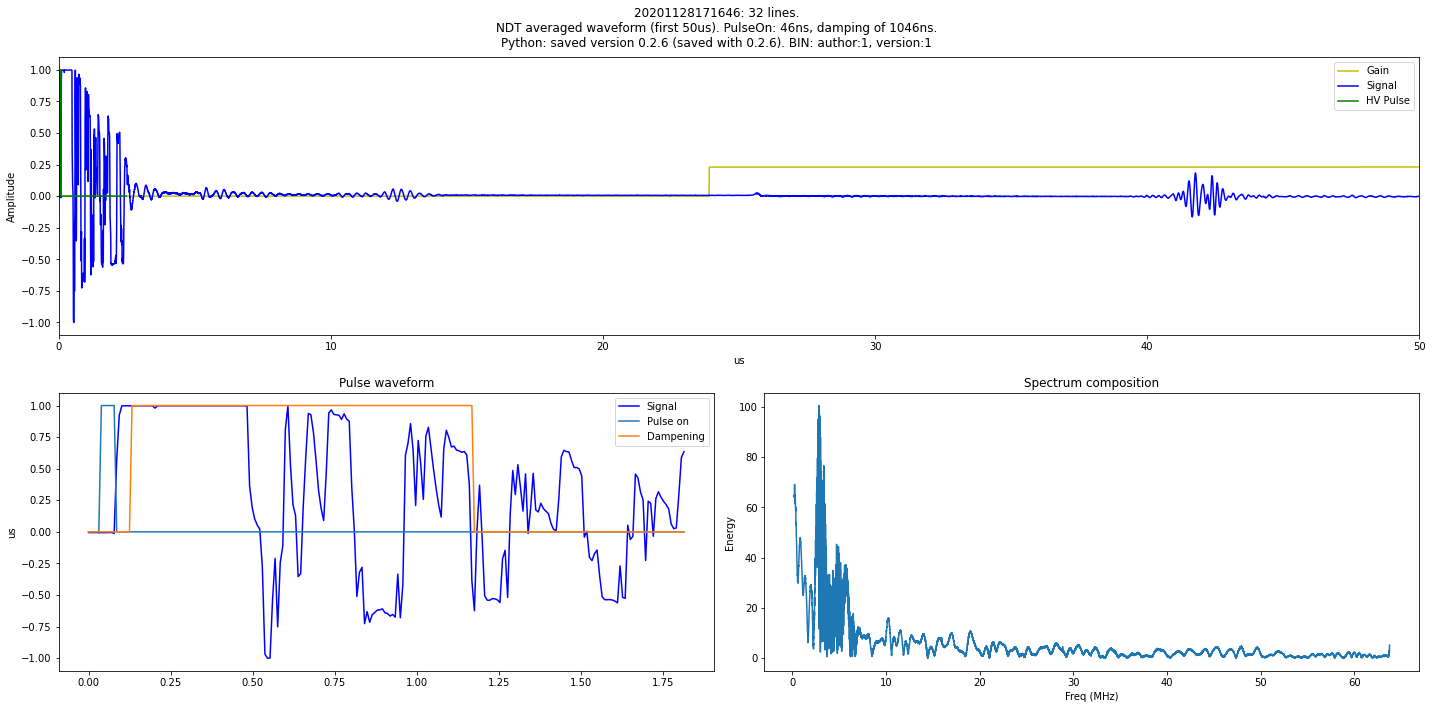

In [114]:
Xwo = []
Ywo = []
for file in withC:
    data = USPlot.readfile(file)
    Xwo.append(int(data["t_on"]))
    if int(data["t_on"]) == 16:
        print(file)
    Ywo.append(np.max(np.abs(data["signal"][0][12500:])))

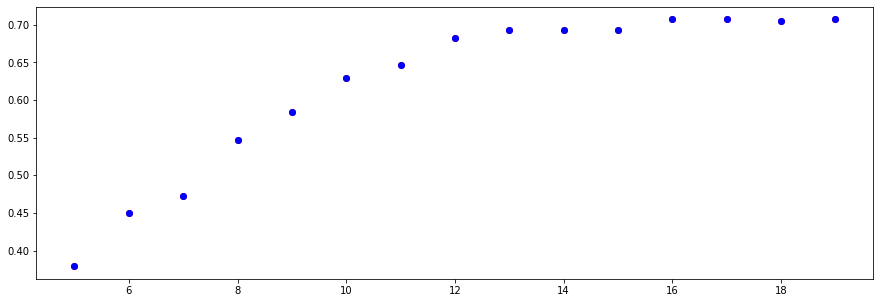

In [111]:
plt.scatter(Xwo, Ywo, c = 'red')
plt.scatter(Xwc, Ywc, c = 'blue')

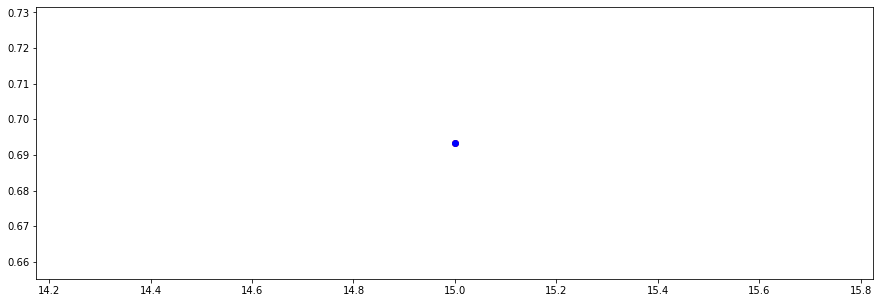

In [113]:
plt.scatter(Xwo[1:2], Ywo[1:2], c = 'red')
plt.scatter(Xwc[1:2], Ywc[1:2], c = 'blue')